Jerry Cheng  
CS-559 Project 3

## Task 1: Exploratory Data Analysis, Feature Engineering, Feature Selection

My first step in EDA for this dataset is to import my libraries, dataframe, and taking an overall look at the shape and head of the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import sklearn
import seaborn as sn

DF = pd.read_csv('properties_2016.csv', low_memory = False)
DF_train = pd.read_csv('train_2016.csv', low_memory = False)
DF = pd.merge(DF, DF_train)

In [3]:
DF.shape

(90275, 60)

In [4]:
pd.options.display.max_columns = None
DF.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,1/27/2016
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,3/30/2016
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,5/27/2016
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,6/7/2016
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,8/8/2016


My next step is to determine the percentage of missing values for each of the features.

In [5]:
DF.isnull().sum()

parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar

In [6]:
DF_num_missing = DF.isnull().sum()
DF_num_missing / len(DF)

parcelid                        0.000000
airconditioningtypeid           0.681185
architecturalstyletypeid        0.997109
basementsqft                    0.999524
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingclasstypeid             0.999823
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
decktypeid                      0.992711
finishedfloor1squarefeet        0.924054
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
finishedsquarefeet13            0.999634
finishedsquarefeet15            0.960521
finishedsquarefeet50            0.924054
finishedsquarefeet6             0.995336
fips                            0.000000
fireplacecnt                    0.893581
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
hashottuborspa                  0.973802
heatingorsystemtypeid           0.378787
latitude        

From the above, we can determine that the following features have > 90% missing values.  
  
(architecturalstyletypeid, basementsqft, buildingclasstypeid, decktypeid, finishedfloor1squarefeet, finishedquarefeet13, finishedquarefeet15, finishedsquarefeet50, finishedsquarefeet6, hashottuborspa, poolsizesum, pooltypeid10, pooltypeid2, storytypeid, typeconstructiontypeid, yardbuildingsqft17, yardbuildingsqft26, fireplaceflag, taxdelinquencyflag, taxdelinquencyyear)  

Therefore, each of these features will be dropped from the dataframe.

It seems that, with a missing percentage of ~0.999, and missing count of 2983589, basementsqft has the highest missing number of values.

In [7]:
DF_removed_90 = DF.drop(columns = ['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'hashottuborspa', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear'])

Just a quick check that we did it correctly.

In [8]:
DF_90_num_missing = DF_removed_90.isnull().sum()
DF_90_num_missing / len(DF_removed_90)

parcelid                        0.000000
airconditioningtypeid           0.681185
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
fips                            0.000000
fireplacecnt                    0.893581
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
heatingorsystemtypeid           0.378787
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.112434
poolcnt                         0.801706
pooltypeid7                     0.815043
propertycountylandusecode       0.000011
propertylandusetypeid           0.000000
propertyzoningdesc              0.354052
rawcensustractandblock          0.000000
regionidcity                    0.019972
regionidcounty  

To figure out the number of cities in each county, we first figure out the number of unique counties. The unique county zip codes turn out to be 3101, 1286, and 2061

In [9]:
DF_removed_90.regionidcounty.unique()

array([2061., 3101., 1286.])

We then create separate dataframes from the DF_removed_90 dataframe for each individual county.

In [10]:
# print(df.loc[df['A'] == 'foo'])
DF_3101 = DF_removed_90[DF_removed_90['regionidcounty'] == 3101]
DF_1286 = DF_removed_90[DF_removed_90['regionidcounty'] == 1286]
DF_2061 = DF_removed_90[DF_removed_90['regionidcounty'] == 2061]

We then count the unique number of cities in each of the separate dataframes.

In [11]:
print('Number of cities in county 3101:', DF_3101.regionidcity.nunique())
print('Number of cities in county 1286:', DF_1286.regionidcity.nunique())
print('Number of cities in county 2061:', DF_2061.regionidcity.nunique())

Number of cities in county 3101: 126
Number of cities in county 1286: 42
Number of cities in county 2061: 19


The next step is to determine which county has the highest and lowest logerrors in each city. To do this, I will be running a describe function on each of the individual county dataframes.

In [12]:
DF_3101['logerror'].describe()

count    58574.000000
mean         0.011191
std          0.170601
min         -4.605000
25%         -0.030500
50%          0.005000
75%          0.041100
max          4.737000
Name: logerror, dtype: float64

In [13]:
DF_1286['logerror'].describe()

count    24505.000000
mean         0.010392
std          0.136874
min         -2.976000
25%         -0.018200
50%          0.006000
75%          0.034400
max          3.289000
Name: logerror, dtype: float64

In [14]:
DF_2061['logerror'].describe()

count    7196.000000
mean        0.017255
std         0.157375
min        -4.605000
25%        -0.020200
50%         0.007000
75%         0.038300
max         3.018000
Name: logerror, dtype: float64

County 3101 has an average log error of 0.011191, minimum log error of -4.605, maximum of 4.737  
County 1286 has an average log error of 0.010392, minimum log error of -2.976, maximum of 3.289  
County 2061 has an average log error of 0.017255, minimum log error of -4.605, maximum of 3.018000  

The next step is to eliminate outliers. The first step to doing so is determining the outliers.

(90275, 40)

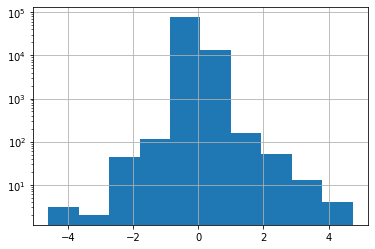

In [15]:
DF_removed_90['logerror'].hist(log=True)
DF_removed_90.shape

As we can see from the histogram, the vast majority of the data lies between [-1,1].   

The highest number of outliers that may be removed is 20, so we will be removing the 10 lowest rows and the 10 highest rows for log error.  

By removing the bottom and top 10, we have eliminated features that have log error above 4, and below -4.

In [16]:
# Sorting the dataframe
DF_sorted = DF_removed_90.sort_values(by='logerror')

# Dropping first and last 10 rows
DF_sorted = DF_sorted.iloc[10:-10]

(90255, 40)

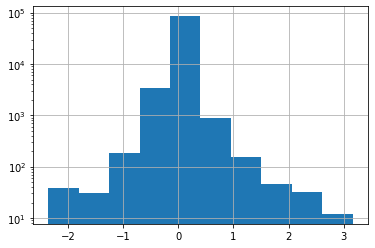

In [17]:
DF_sorted['logerror'].hist(log=True)
DF_sorted.shape

The next step in our EDA phase is to take a look at the data dictionary, and make decisions on id's that can be eliminated.  

In this assignment, logerror is defined as the log-error between the price Zillow estimates and actual sale price. Therefore, we will be looking for id's that would arguably have no direct or very little effect on the price of a certain piece of real estate.

As we have already removed some features do to having a >90% missing value rate, it is neccessary to check which features are still remaining.

In [18]:
DF_sorted.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
12290,11046267,1.0,2.0,2.0,7.0,2.0,844.0,844.0,6037.0,NaN,2.0,NaN,NaN,2.0,34246900.0,-118467000.0,73888.0,1.0,1.0,010C,266.0,LARD1.5,6.037117e+07,12447.0,3101.0,13017.0,96369.0,0.0,NaN,1.0,1985.0,NaN,99813.0,142524.0,2015.0,42711.0,1747.49,6.037117e+13,-2.354,3/2/2016
62899,13989753,NaN,2.0,4.0,NaN,2.0,1053.0,1053.0,6059.0,NaN,2.0,1.0,396.0,NaN,33823340.0,-117960906.0,7260.0,NaN,NaN,122,261.0,NaN,6.059088e+07,16764.0,1286.0,275496.0,97023.0,7.0,NaN,NaN,1955.0,1.0,27036.0,52055.0,2015.0,25019.0,983.62,6.059088e+13,-2.354,6/2/2016
62073,14717914,NaN,2.5,3.0,NaN,2.5,1348.0,1348.0,6059.0,NaN,2.0,1.0,0.0,NaN,33581981.0,-117734993.0,NaN,NaN,NaN,34,266.0,NaN,6.059063e+07,37086.0,1286.0,NaN,96974.0,0.0,1.0,NaN,1996.0,NaN,178956.0,473000.0,2015.0,294044.0,4683.26,6.059063e+13,-2.354,8/11/2016
56578,14129142,NaN,2.0,3.0,NaN,2.0,1595.0,1595.0,6059.0,NaN,2.0,2.0,446.0,NaN,33848249.0,-117880544.0,7210.0,NaN,NaN,122,261.0,NaN,6.059086e+07,16764.0,1286.0,274765.0,97025.0,7.0,NaN,NaN,1958.0,2.0,93785.0,438591.0,2015.0,344806.0,5184.80,6.059086e+13,-2.333,7/26/2016
8213,11320030,1.0,4.0,4.0,4.0,4.0,2704.0,2704.0,6037.0,NaN,4.0,NaN,NaN,2.0,34649638.0,-118257354.0,12044.0,NaN,NaN,0100,261.0,LCC1-RA100,6.037901e+07,5534.0,3101.0,NaN,97319.0,0.0,NaN,1.0,1990.0,NaN,221300.0,281000.0,2015.0,59700.0,4701.65,6.037901e+13,-2.333,1/19/2016


ids/features that I will be removing:

fips: The fips, or federal information processing standard code for counties, simply identifies the county location that the real estate is in. Because we already use regionidcounty to identify county, the fips feature is redundant, and only bloats the data.  

pooltypeid7: pooltypeid7 describes whether a house with a pool contains a hot tub or not. According to this link: https://www.familyhandyman.com/article/hot-tub-increase-home-value/, hot tubs do not have a significant effect on a house's valuation. Even though the prescence of a pool may have a small effect on the house's valuation, a hot tub does not.

transactiondate: the transaction date is not extremely relevant to the housing prices.

structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount: While the value of a house may cause taxes to be higher, the reverse is not true.

assessmentyear: The year in which a house's tax value is assessed is not relevant.

propertyzoningdesc, propertycountylandusecode: These property zonings do not have a direct affect on the value of a piece of realestate

parcelid: We no longer need the parcel ids, as we have already merged our training data and regular data tables

finishdsquarefeet12: Redundant; accounted for in calculatedfinishdsquarefeet

In [19]:
DF_sorted_removed = DF_sorted.drop(columns=['fips', 'pooltypeid7', 'transactiondate', 'structuretaxvaluedollarcnt', 
                                            'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
                                           'censustractandblock', 'propertyzoningdesc', 'propertycountylandusecode', 
                                           'threequarterbathnbr', 'regionidcity', 'regionidcounty', 'regionidneighborhood'
                                           , 'regionidzip', 'parcelid', 'fullbathcnt', 'finishedsquarefeet12', 'rawcensustractandblock'])

DF_sorted_removed = DF_sorted_removed.replace(np.nan, 0)
DF_sorted_removed.head()


,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fireplacecnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,propertylandusetypeid,roomcnt,unitcnt,yearbuilt,numberofstories,logerror
12290,1.0,2.0,2.0,7.0,2.0,844.0,0.0,0.0,0.0,2.0,34246900.0,-118467000.0,73888.0,1.0,266.0,0.0,1.0,1985.0,0.0,-2.354
62899,0.0,2.0,4.0,0.0,2.0,1053.0,0.0,1.0,396.0,0.0,33823340.0,-117960906.0,7260.0,0.0,261.0,7.0,0.0,1955.0,1.0,-2.354
62073,0.0,2.5,3.0,0.0,2.5,1348.0,0.0,1.0,0.0,0.0,33581981.0,-117734993.0,0.0,0.0,266.0,0.0,0.0,1996.0,0.0,-2.354
56578,0.0,2.0,3.0,0.0,2.0,1595.0,0.0,2.0,446.0,0.0,33848249.0,-117880544.0,7210.0,0.0,261.0,7.0,0.0,1958.0,2.0,-2.333
8213,1.0,4.0,4.0,4.0,4.0,2704.0,0.0,0.0,0.0,2.0,34649638.0,-118257354.0,12044.0,0.0,261.0,0.0,1.0,1990.0,0.0,-2.333


The next step is the determine the correlations between the house size and the room numbers.

In [20]:
#df['column1'].corr(df['column2'])
corr = DF_sorted_removed['calculatedfinishedsquarefeet'].corr(DF_sorted_removed['roomcnt'])

print(corr)

0.10387572201290234


From the above calculation, we can see that there is a positive correlation between a house's size in square feet and number of rooms. This makes sense because a bigger house usually has more rooms in it.

The next step is to split the data into training and testing data, with an 80-20 split.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(DF_sorted_removed.iloc[:, :-1], 
                                                    DF_sorted_removed.iloc[:, -1:], 
                                                    train_size = 0.8, test_size = 0.2, random_state=1)

## Task 2: Use a random forest classifier

Task 2 of this project is to use a random forest classifier to determine the top 5 most weighted features that dominate overpricing houses. In other words, which features have the greatest effect in creating a bigger log error.

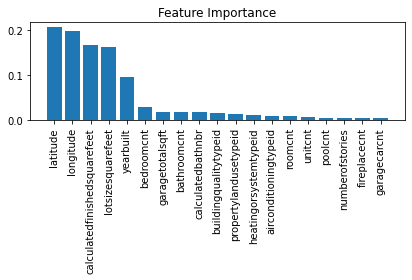

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train the classifier
clf.fit(X_train_std, y_train.values.ravel())

importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

From the graph above, we can see that the most important features to valuing a house have to do with the size of the house itself. These would include the lotsizesquarefeet, the calculatedfinishedsquarefeet, finishedsquarefeet12. The year built also has a large effect on the value, which makes sense that older property would be worth less.

Latitude and longitude also seem to have a great effect. This makes sense, as certain houses in neighborhoods are valued higher or lower.

## Task 3: Linear Regression, Decision Tree, XGBoost, and ensembled methods

The first step is to use linear regression to try and predict the logerror.

In [23]:
from sklearn.linear_model import LinearRegression

slr=LinearRegression()
slr.fit(X_train, y_train)

y_train_pred=slr.predict(X_train)

print(y_train_pred)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

[[0.01518601]
 [0.01213249]
 [0.00853156]
 ...
 [0.01445719]
 [0.0142726 ]
 [0.01075104]]
MSE train: 0.023
R^2 train: 0.002


After running the linear regression, we can see that the prediction is not very good.

The next step is to try to use decision tree regression to predict the logerror.

In [24]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)
train_error = (1 - tree_model.score(X_train, y_train))
test_error = (1 - tree_model.score(X_test, y_test))

y_train_pred=tree_model.predict(X_train)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                           

MSE train: 0.001
R^2 train: 0.974


The next step is to try to use random forest regression to predict the log error.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf.fit(X_train_std, y_train.values.ravel())

y_train_pred=clf.predict(X_train)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                           

MSE train: 0.196
R^2 train: -7.475


The next step is to try to use xgboost to predict the log error.

In [30]:
import xgboost
xg_model = xgboost.XGBRegressor()
xg_model.fit(X_train,y_train)

xgy_train_pred=xg_model.predict(X_train)
xgy_test_pred=xg_model.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,xgy_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,xgy_train_pred)))


MSE train: 0.017
R^2 train: 0.281


/home/jerry/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Task 4 & 5 Completed on Attacehd Word Document

## Task 6: Average Log Error, details on Word Doc

In [27]:
DF_sorted_removed['logerror'].describe()

count    90255.000000
mean         0.011398
std          0.152018
min         -2.354000
25%         -0.025300
50%          0.006000
75%          0.039200
max          3.160000
Name: logerror, dtype: float64